In [1]:
from LorenzEDMD.EDMD.EDMD import EDMD_CHEB
from matplotlib import pyplot as plt
import numpy as np
import pickle
from LorenzEDMD.utils.data_processing import get_spectral_properties
from LorenzEDMD.dynamical_system.Lorenz import lorenz63
from LorenzEDMD.EDMD.EDMD import Tikhonov, TSVD

In [2]:
with open("edmd_objects.pkl", "rb") as f:
    EDMDS = pickle.load(f)

lorenz = lorenz63()
degrees = [x[0].degree for x in EDMDS]
flight_times = [x.flight_time for x in EDMDS[0]]

#### Let's regularise the spectral properties

##### Let's check in terms of degrees

In [3]:
EDMDS_degrees = [x[0] for x in EDMDS]
TSVDS_degrees = []

for edmd in EDMDS_degrees:
    tsvd_regulariser = TSVD(rel_threshold=1e-6)
    Kreduced = tsvd_regulariser.decompose(edmd)
    TSVDS_degrees.append(tsvd_regulariser)

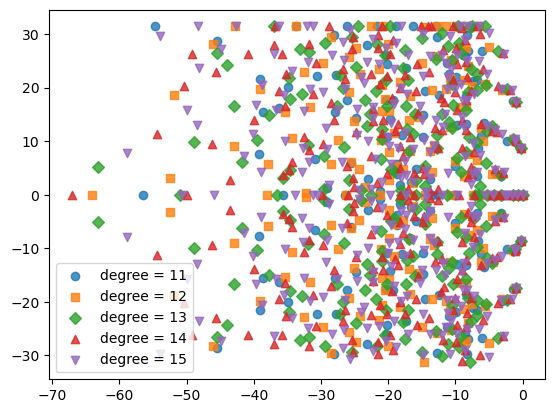

In [5]:
# List of markers to choose from
markers = ['o', 's', 'D', '^', 'v', 'p', '*', '+', 'x']
fig, ax = plt.subplots()
for i , (edmd,tvsd) in enumerate(zip(EDMDS_degrees,TSVDS_degrees)):
    K =  tvsd.Kreduced
    eigenvalues , eigenvectors = get_spectral_properties(K)
    lambdas = np.log(eigenvalues) / ( lorenz.dt * lorenz.tau * edmd.flight_time)
    ax.scatter(np.real(lambdas),np.imag(lambdas),
               label=f"degree = {degrees[i]}",marker=markers[i],alpha=0.8)

ax.legend()